In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

#### Node Attributes
1. Outfacing Edge 
2. Infacing Edge  
3. What can be estimated (Object of node's estimates about  another node) 
4. What can be controlled  (Object)
5. In bandwidth constraint 
6. Out bandwidth contraint 
7. List of messages a node has 
8. Message Sizes
8. Storage Capacity for each node
8. Proximity Order

Edge bandwidth constraint should be min(inbound bandwidth at j, outbound bandwidth at i)

In [2]:
from src.sim import run

[{'N': 3, 'T': range(0, 182), 'M': {'block_time': 30, 'i_storage': 500, 'i_in_bandwidth': 500, 'i_out_bandwidth': 140, 'j_storage': 500, 'j_in_bandwidth': 400, 'j_out_bandwidth': 100, 'p_storage': 4000, 'p_in_bandwidth': 400, 'p_out_bandwidth': 600, 'k_storage': 8000, 'k_in_bandwidth': 400, 'k_out_bandwidth': 80, 'j_avail_to_i': 0.9, 'k_avail_to_i': 0.8, 'j_avail_to_k': 0.7, 'p_avail_to_i': 0.6, 'depth': 15}}, {'N': 3, 'T': range(0, 182), 'M': {'block_time': 30, 'i_storage': 500, 'i_in_bandwidth': 1234, 'i_out_bandwidth': 140, 'j_storage': 500, 'j_in_bandwidth': 400, 'j_out_bandwidth': 100, 'p_storage': 4000, 'p_in_bandwidth': 400, 'p_out_bandwidth': 600, 'k_storage': 8000, 'k_in_bandwidth': 400, 'k_out_bandwidth': 80, 'j_avail_to_i': 0.9, 'k_avail_to_i': 0.8, 'j_avail_to_k': 0.7, 'p_avail_to_i': 0.6, 'depth': 15}}]
[{'N': 3, 'T': range(0, 182), 'M': {'block_time': 30, 'i_storage': 500, 'i_in_bandwidth': 500, 'i_out_bandwidth': 140, 'j_storage': 500, 'j_in_bandwidth': 400, 'j_out_bandw

In [3]:
experiments = run.run()


                            __________   ____ 
          ________ __ _____/ ____/   |  / __ \
         / ___/ __` / __  / /   / /| | / / / /
        / /__/ /_/ / /_/ / /___/ ___ |/ /_/ / 
        \___/\__,_/\__,_/\____/_/  |_/_____/  
        by BlockScience
        
Execution Mode: multi_proc: [<cadCAD.configuration.Configuration object at 0x0000024727BEBC88>, <cadCAD.configuration.Configuration object at 0x0000024727BEBCC0>]
Configurations: [<cadCAD.configuration.Configuration object at 0x0000024727BEBC88>, <cadCAD.configuration.Configuration object at 0x0000024727BEBCC0>]


In [4]:
print(experiments)

   index  block_time  i_storage  i_in_bandwidth  i_out_bandwidth  j_storage  \
0      0          30        500             500              140        500   
1      0          30        500            1234              140        500   

   j_in_bandwidth  j_out_bandwidth  p_storage  p_in_bandwidth  \
0             400              100       4000             400   
1             400              100       4000             400   

   p_out_bandwidth  k_storage  k_in_bandwidth  k_out_bandwidth  j_avail_to_i  \
0              600       8000             400               80           0.9   
1              600       8000             400               80           0.9   

   k_avail_to_i  j_avail_to_k  p_avail_to_i  depth  \
0           0.8           0.7           0.6     15   
1           0.8           0.7           0.6     15   

                                             dataset  
0        timestamp message_array  \
0    2020-01-...  
1        timestamp message_array  \
0    2020-01-...

In [5]:
max(experiments.dataset[0]['run'])

3

In [6]:
first_exp = experiments.dataset[0]

In [7]:
end_key = (len(experiments.dataset[0]) / max(experiments.dataset[0]['run']) -1) * max(experiments.dataset[0]['substep'])
end_key = int(end_key)

In [8]:
first_exp.head()

,timestamp,message_array,message_list,file_list,demand,arrival,message_arrival,network,gross_storage_demand,least_storage_demand,PO,test,run,substep,timestep
0,2020-01-01,"[[0, 0, 0]]","[[None, None, None], [None, None, None]]","[[None, None, None], [None, None, None]]",0,0,"[[None, None, None], [None, None, None]]","(i, j, k, p)",0,0,0,0,1,0,0
4,2020-01-01,"[[0, 0, 0]]","[[None, None, None], [None, None, None], [1620...","[[None, None, None], [None, None, None]]","[1620082912, 166, 1]","[1620079520, 60, 1]","[1620078304, 22, 1]","(i, j, k, p)",0,0,0b11,176,1,4,1
8,2020-01-01,"[[0, 0, 0]]","[[None, None, None], [None, None, None], [1620...","[[None, None, None], [None, None, None]]","[1620077664, 2, 1]","[1620078208, 19, 1]","[1620077632, 1, 1]","(i, j, k, p)",168,168,0b11,8,1,4,2
12,2020-01-01,"[[0, 0, 0]]","[[None, None, None], [None, None, None], [1620...","[[None, None, None], [None, None, None]]","[1620080128, 79, 1]","[1620079616, 63, 1]","[1620080320, 85, 1]","(i, j, k, p)",247,247,0b11,340,1,4,3
16,2020-01-01,"[[0, 0, 0]]","[[None, None, None], [None, None, None], [1620...","[[None, None, None], [None, None, None]]","[1620078688, 34, 1]","[1620079616, 63, 1]","[1620080096, 78, 1]","(i, j, k, p)",281,281,0b11,312,1,4,4


In [9]:
def draw_net(end_index):
    G = experiments.dataset[0]['network'][end_index]
    pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos, node_size=700)
    nx.draw_networkx_edges(G, pos, width=4)
    nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')
    plt.axis('off')
    return plt.show()

In [10]:
# get end keys for each run
N = max(experiments.dataset[0]['run'])
key_vals = []
for n in range(1,N+1):
    subs = max(experiments.dataset[0]['substep'])
    times = max(experiments.dataset[0]['timestep'])
    if n == 0:
        number = n*subs*times
    number = n*subs*times + (n-1)
    key_vals.append(number)

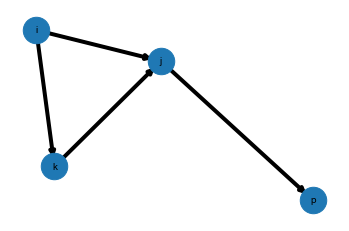

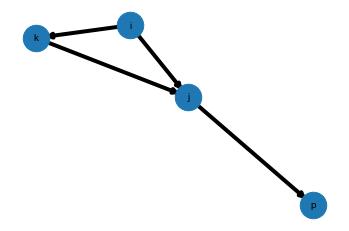

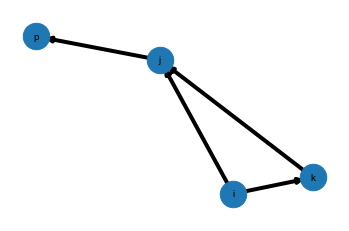

In [11]:
for x in key_vals:
    draw_net(x)

In [12]:
experiments.dataset[0]['network'][728].adj['i']

AtlasView({'j': {'traffic': 25}, 'k': {'traffic': 13194}})

In [13]:
experiments.dataset[0]['network'][1457].adj['i']

AtlasView({'j': {'traffic': 1}, 'k': {'traffic': 13234}})

In [14]:
experiments.dataset[0]['network'][2186].adj['i']

AtlasView({'j': {'traffic': 71}, 'k': {'traffic': 12196}})

In [15]:
key_vals

[728, 1457, 2186]

In [16]:
# by_run = experiments.dataset[1].groupby(['run'])
# by_run['network'].head()

In [17]:
# traffic =np.zeros(1)

# for x in key_vals:
#     run_start = 
#     n=0
#     if n <= x:
#         for n in range(0,x,4):
#             i_to_k = experiments.dataset[1]['network'][n].adj['i']['k']['traffic']
#             i_to_j = experiments.dataset[1]['network'][n].adj['i']['j']['traffic']
#             total = i_to_k + i_to_j
#             traffic = np.vstack((traffic,total))

In [18]:
traffic =np.zeros(1)
traffic2 =np.zeros(1)
traffic3 =np.zeros(1)

ftraffic =np.zeros(1)
ftraffic2 =np.zeros(1)
ftraffic3 =np.zeros(1)

for n in range(0,728,4):
    i_to_k = experiments.dataset[1]['network'][n].adj['i']['k']['traffic']
    i_to_j = experiments.dataset[1]['network'][n].adj['i']['j']['traffic']
    k_to_j = experiments.dataset[1]['network'][n].adj['k']['j']['traffic']
    total = i_to_k + i_to_j + k_to_j 
    traffic = np.vstack((traffic,total))
    ftotal = experiments.dataset[1]['test'][n] + i_to_k + i_to_j + k_to_j 
    ftraffic  = np.vstack((ftraffic,ftotal))
    
for n in range(733,1457,4):
    i_to_k = experiments.dataset[1]['network'][n].adj['i']['k']['traffic']
    i_to_j = experiments.dataset[1]['network'][n].adj['i']['j']['traffic']
    k_to_j = experiments.dataset[1]['network'][n].adj['k']['j']['traffic']
    total = i_to_k + i_to_j + k_to_j 
    traffic2 = np.vstack((traffic2,total))
    ftotal = experiments.dataset[1]['test'][n] + i_to_k + i_to_j + k_to_j 
    ftraffic2  = np.vstack((ftraffic2,ftotal))

for n in range(1458,2186,4):
    i_to_k = experiments.dataset[1]['network'][n].adj['i']['k']['traffic']
    i_to_j = experiments.dataset[1]['network'][n].adj['i']['j']['traffic']
    k_to_j = experiments.dataset[1]['network'][n].adj['k']['j']['traffic']
    total = i_to_k + i_to_j + k_to_j 
    traffic3 = np.vstack((traffic3,total))
    ftotal = experiments.dataset[1]['test'][n] + i_to_k + i_to_j + k_to_j 
    ftraffic3  = np.vstack((ftraffic3,ftotal))

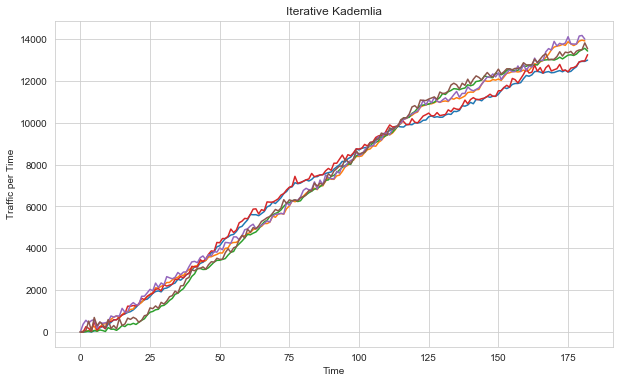

In [19]:
plt.figure(figsize=(10,6))
plt.plot(traffic)
plt.plot(traffic2)
plt.plot(traffic3)
plt.plot(ftraffic)
plt.plot(ftraffic2)
plt.plot(ftraffic3)
plt.title('Iterative Kademlia')
plt.xlabel('Time')
plt.ylabel('Traffic per Time')
plt.show()

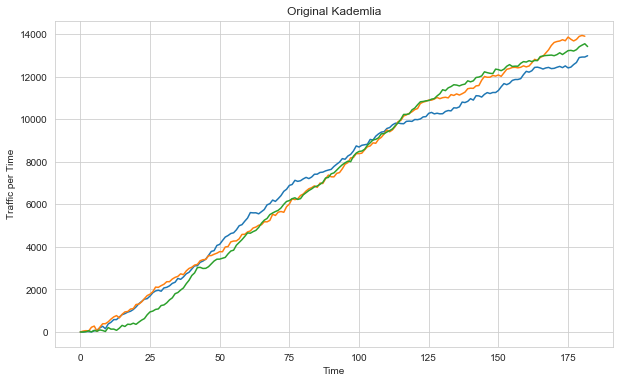

In [20]:
plt.figure(figsize=(10,6))
plt.plot(traffic)
plt.plot(traffic2)
plt.plot(traffic3)

plt.title('Original Kademlia')
plt.xlabel('Time')
plt.ylabel('Traffic per Time')
dir_name = 'images/'
file_name = 'orig_traffic'
plt.savefig(dir_name+file_name)
plt.show()

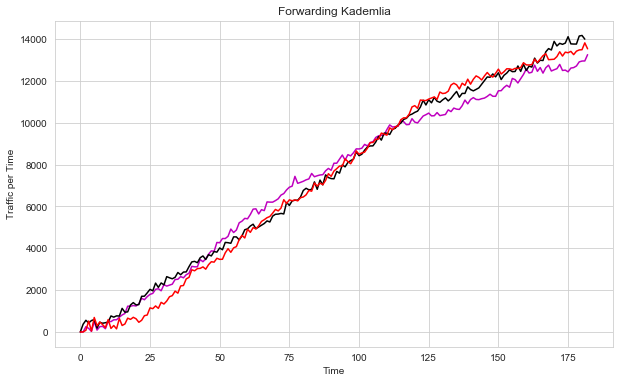

In [21]:
plt.figure(figsize=(10,6))
plt.plot(ftraffic, color = 'm')
plt.plot(ftraffic2, color = 'k')
plt.plot(ftraffic3, color= 'r')
plt.title('Forwarding Kademlia')
plt.xlabel('Time')
plt.ylabel('Traffic per Time')

dir_name = 'images/'
file_name = 'forwarding_traffic'
plt.savefig(dir_name+file_name)
plt.show()

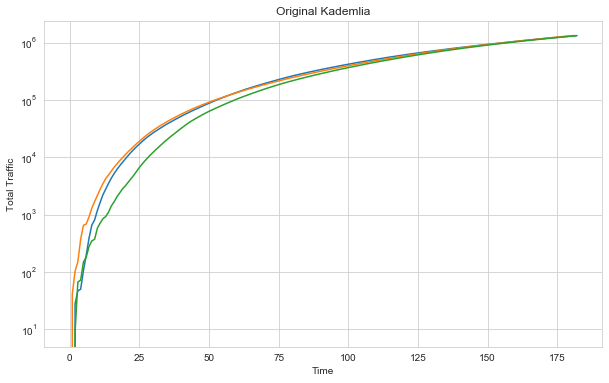

In [22]:
plt.figure(figsize=(10,6))
plt.plot(traffic.cumsum())
plt.plot(traffic2.cumsum())
plt.plot(traffic3.cumsum())
plt.title('Original Kademlia')

plt.yscale('log')
plt.xlabel('Time')
plt.ylabel('Total Traffic')

dir_name = 'images/'
file_name = 'orig_cumul_traffic'
plt.savefig(dir_name+file_name)
plt.show()

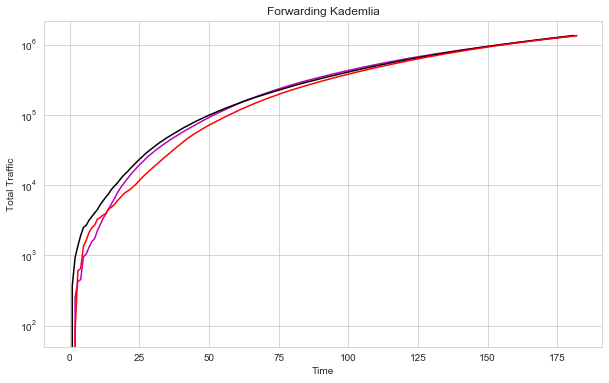

In [23]:
plt.figure(figsize=(10,6))

plt.plot(ftraffic.cumsum(), color = 'm')
plt.plot(ftraffic2.cumsum(), color = 'k')
plt.plot(ftraffic3.cumsum(), color= 'r')
plt.title('Forwarding Kademlia')

plt.yscale('log')
plt.xlabel('Time')
plt.ylabel('Total Traffic')

dir_name = 'images/'
file_name = 'forwarding_cumul_traffic'
plt.savefig(dir_name+file_name)
plt.show()

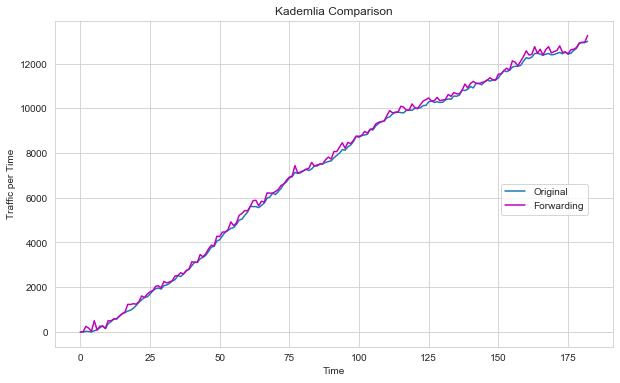

In [24]:
plt.figure(figsize=(10,6))
plt.plot(traffic, label = "Original")
plt.plot(ftraffic, color = 'm', label = "Forwarding")

plt.title('Kademlia Comparison')
plt.legend(bbox_to_anchor=(0.8, 0.5), loc=2, borderaxespad=0.)


plt.xlabel('Time')
plt.ylabel('Traffic per Time')

dir_name = 'images/'
file_name = 'comp_traffic'
plt.savefig(dir_name+file_name)
plt.show()

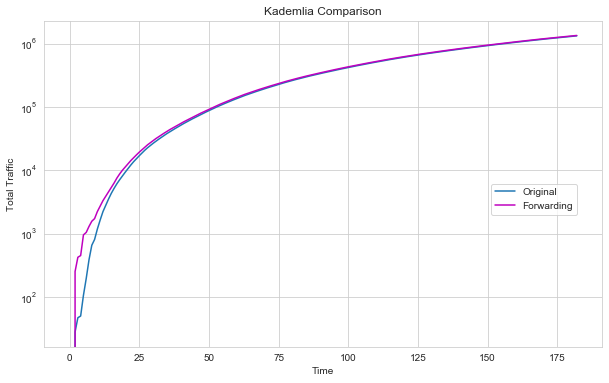

In [25]:
plt.figure(figsize=(10,6))
plt.plot(traffic.cumsum(), label = "Original")
plt.plot(ftraffic.cumsum(), color = 'm', label = "Forwarding")

plt.title('Kademlia Comparison')
plt.legend(bbox_to_anchor=(0.8, 0.5), loc=2, borderaxespad=0.)

plt.yscale('log')
plt.xlabel('Time')
plt.ylabel('Total Traffic')

dir_name = 'images/'
file_name = 'comp_cumul_traffic'
plt.savefig(dir_name+file_name)
plt.show()

In [26]:
time_ten = max(experiments.dataset[0]['substep']) * 10
experiments.dataset[0]['network'][time_ten] 

In [27]:
experiments.dataset[1]['test']

0         0
4       224
8       152
12       24
16      448
       ... 
2170     64
2174      0
2178    260
2182    108
2186    148
Name: test, Length: 549, dtype: int64

In [28]:
# nunique = experiments[[item for item in experiments.columns if item not in ['dataset']]].applymap(str).apply(pd.Series.nunique)
# cols_to_drop = nunique[nunique == 1].index
# experiments_full = experiments.copy()
# experiments = experiments.drop(cols_to_drop, axis=1)
# experiments = experiments_full

In [29]:
experiments.head()

,index,block_time,i_storage,i_in_bandwidth,i_out_bandwidth,j_storage,j_in_bandwidth,j_out_bandwidth,p_storage,p_in_bandwidth,p_out_bandwidth,k_storage,k_in_bandwidth,k_out_bandwidth,j_avail_to_i,k_avail_to_i,j_avail_to_k,p_avail_to_i,depth,dataset
0,0,30,500,500,140,500,400,100,4000,400,600,8000,400,80,0.9,0.8,0.7,0.6,15,timestamp message_array \ 0 2020-01-...
1,0,30,500,1234,140,500,400,100,4000,400,600,8000,400,80,0.9,0.8,0.7,0.6,15,timestamp message_array \ 0 2020-01-...


In [30]:
end_of_first_experiment = experiments.dataset[0]

In [31]:
end_of_first_experiment.PO

0          0
4       0b11
8       0b11
12      0b11
16      0b11
        ... 
2170    0b11
2174    0b11
2178    0b11
2182    0b11
2186    0b11
Name: PO, Length: 549, dtype: object

In [32]:
# Remove None from message list
message_list = list(filter(any, experiments.dataset[0]['message_list'][end_key])) 
# message_list = [i for i in experiments.dataset[0]['message_list'][540] if i] 
message_list[0:15]

[[1620082912, 166, 3],
 [1620077664, 2, 1],
 [1620080128, 79, 5],
 [1620078688, 34, 1],
 [1620083872, 196, 7],
 [1620080000, 75, 3],
 [1620081952, 136, 3],
 [1620081504, 122, 1],
 [1620079264, 52, 1],
 [1620077728, 4, 1],
 [1620081120, 110, 1],
 [1620083360, 180, 1],
 [1620082112, 141, 3],
 [1620083072, 171, 1],
 [1620079488, 59, 5]]

In [33]:
experiments.dataset[0]['network'][time_ten].nodes['i']['current_capacity']

481

In [34]:
message_array = np.array(message_list[0:5])
message_array

array([[1620082912,        166,          3],
       [1620077664,          2,          1],
       [1620080128,         79,          5],
       [1620078688,         34,          1],
       [1620083872,        196,          7]])

In [35]:
# Lower limit of Message Storage Demand , No Double Storage
message_array[:,1].sum()

477

In [36]:
message_array[:,1:2].prod()

174783392

In [37]:
np.multiply(message_array[:,1], message_array[:,2])

array([ 498,    2,  395,   34, 1372])

In [38]:
np.sum(np.multiply(message_array[:,1], message_array[:,2]))

2301

In [39]:
experiments.dataset[0]['arrival'][time_ten]

[1620078400, 25, 1]

In [40]:
experiments.dataset[0]['demand'][time_ten]

[1620077728, 4, 1]

In [41]:
experiments.dataset[0]['least_storage_demand'][time_ten]

866

In [42]:
experiments.dataset[0]['network'][end_key].nodes['i']

{'neighbor_estimate': {'j_avail_to_i': array([0.96]),
  'k_avail_to_i': array([0.89]),
  'p_avail_to_i': [0.6]},
 'storage_capacity': [500],
 'current_storage': [[None, None, None],
  [None, None, None],
  [1620082912, 166, 3],
  [1620077664, 2, 1],
  [1620080128, 79, 5],
  [1620078688, 34, 1],
  [1620083872, 196, 7],
  [1620077728, 4, 1],
  [1620077920, 10, 1],
  [1620077696, 3, 3],
  [1620077792, 6, 3]],
 'current_capacity': 500,
 'inband': 500,
 'outband': [140],
 'message_history': [[None, None, None], [None, None, None]],
 'control': [],
 'id': 12,
 'routing_table': [['i', 12, '0b1100', 0, '0b1100'],
  ['j', 14, '0b1110', 2, '0b11'],
  ['k', 0, '0b0000', 12, '0b'],
  ['p', 0, '0b0000', 12, '0b']]}

In [43]:
experiments.dataset[0]['network'][end_key].nodes['i']['neighbor_estimate']

{'j_avail_to_i': array([0.96]),
 'k_avail_to_i': array([0.89]),
 'p_avail_to_i': [0.6]}

In [44]:
experiments.dataset[0]['network'][end_key].nodes['i']['routing_table']

[['i', 12, '0b1100', 0, '0b1100'],
 ['j', 14, '0b1110', 2, '0b11'],
 ['k', 0, '0b0000', 12, '0b'],
 ['p', 0, '0b0000', 12, '0b']]

In [45]:
experiments.dataset[0]['network'][1457].nodes['i']['neighbor_estimate']

{'j_avail_to_i': array([0.95]),
 'k_avail_to_i': array([0.83]),
 'p_avail_to_i': [0.6]}

In [46]:
experiments.dataset[0]['network'][1457].nodes['i']['routing_table']

[['i', 12, '0b1100', 0, '0b1100'],
 ['j', 14, '0b1110', 2, '0b11'],
 ['k', 0, '0b0000', 12, '0b'],
 ['p', 0, '0b0000', 12, '0b']]

In [47]:
experiments.dataset[1]['network'][end_key].nodes['i']

{'neighbor_estimate': {'j_avail_to_i': array([0.94]),
  'k_avail_to_i': array([0.93]),
  'p_avail_to_i': [0.6]},
 'storage_capacity': [500],
 'current_storage': [[None, None, None],
  [None, None, None],
  [1620079392, 56, 5],
  [1620080288, 84, 7],
  [1620082624, 157, 1],
  [1620077792, 6, 7],
  [1620081248, 114, 5],
  [1620079136, 48, 1],
  [1620077824, 7, 3],
  [1620078208, 19, 5],
  [1620077632, 1, 1],
  [1620077696, 3, 1],
  [1620077760, 5, 1]],
 'current_capacity': 500,
 'inband': 1234,
 'outband': [140],
 'message_history': [[None, None, None], [None, None, None]],
 'control': [],
 'id': 12,
 'routing_table': [['i', 12, '0b1100', 0, '0b1100'],
  ['j', 14, '0b1110', 2, '0b11'],
  ['k', 0, '0b0000', 12, '0b'],
  ['p', 0, '0b0000', 12, '0b']]}

In [48]:
experiments.dataset[1]['network'][end_key].nodes['j']

{'neighbor_estimate': {'storage from i': 6,
  'storage from k': 0,
  'messages from i': 182,
  'messages from k': 0},
 'storage_capacity': [500],
 'current_storage': [[None, None, None],
  [None, None, None],
  [1620083456, 183, 1],
  [1620083296, 178, 1],
  [1620080960, 105, 3],
  [1620078656, 33, 3]],
 'current_capacity': 499,
 'inband': [400],
 'outband': [100],
 'message_history': [[None, None, None],
  [None, None, None],
  [1620078496, 28, 1],
  [1620078208, 19, 1],
  [1620077696, 3, 1],
  [1620079392, 56, 1],
  [0, 0, 177],
  [1620077856, 8, 1]],
 'control': [],
 'id': 14,
 'routing_table': [['i', 12, '0b1100', 2, '0b11'],
  ['j', 14, '0b1110', 0, '0b1110'],
  ['k', 0, '0b0000', 14, '0b'],
  ['p', 0, '0b0000', 14, '0b']]}

In [49]:
experiments.dataset[1]['network'][end_key].nodes['k']

{'neighbor_estimate': {'storage from i': 117,
  'messages from i': 0,
  'j_avail_to_k': array([0.82])},
 'storage_capacity': [8000],
 'current_storage': [[None, None, None],
  [None, None, None],
  [1620082464, 152, 5],
  [1620083648, 189, 3],
  [1620082240, 145, 3],
  [1620081952, 136, 3],
  [1620080608, 94, 1],
  [1620082144, 142, 5],
  [1620079232, 51, 3],
  [1620080640, 95, 3],
  [1620082656, 158, 1],
  [1620082816, 163, 1],
  [1620079840, 70, 5],
  [1620079584, 62, 3],
  [1620080192, 81, 3],
  [1620081568, 124, 3],
  [1620080864, 102, 3],
  [1620082080, 140, 1],
  [1620081472, 121, 1],
  [1620079296, 53, 1],
  [1620080000, 75, 3],
  [1620078784, 37, 1],
  [1620081024, 107, 3],
  [1620079872, 71, 3],
  [1620082304, 147, 3],
  [1620080064, 77, 1],
  [1620081312, 116, 7],
  [1620083904, 197, 3],
  [1620080768, 99, 1],
  [1620080160, 80, 3],
  [1620082912, 166, 5],
  [1620083744, 192, 1],
  [1620079328, 54, 1],
  [1620079744, 67, 3],
  [1620083104, 172, 1],
  [1620081632, 126, 5],
  [

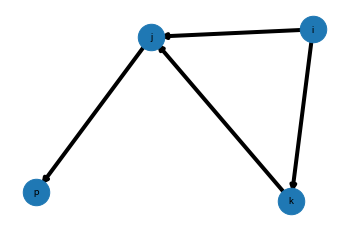

In [50]:
draw_net(end_key)

In [51]:
# End network State
G = experiments.dataset[1]['network'][end_key]
pos = nx.spring_layout(G)

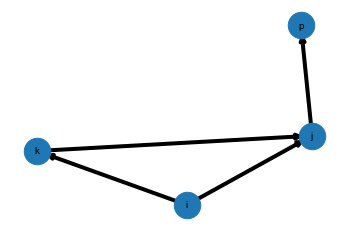

In [52]:
#nx.draw(G)
nx.draw_networkx_nodes(G, pos, node_size=700)
nx.draw_networkx_edges(G, pos, width=4)
nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')
plt.axis('off')
plt.show()

In [53]:
def message_metrics(node_name):
    i_message_list = list(filter(any, experiments.dataset[1]['network'][end_key].nodes[str(node_name)]['current_storage'])) 
    # convert to array
    i_message_array = np.array(i_message_list)
    #print(message_array)
    # sum of sizes of messages without repeats representing the lower bound, if every node only stored the file once
    total = np.nansum(i_message_array[:,1])
    mean = total / len(i_message_array)
    total_freq = np.nansum(i_message_array[:,2])
    freq = total_freq / len(i_message_array)
    
    return print('Node ', node_name, ": Average Stored Size = ", format(mean, ".2f"), ", Average Frequency = ", format(freq, ".2f"))

In [54]:
message_metrics('i')
message_metrics('j')
message_metrics('k')

Node  i : Average Stored Size =  45.45 , Average Frequency =  3.36
Node  j : Average Stored Size =  124.75 , Average Frequency =  2.00
Node  k : Average Stored Size =  108.07 , Average Frequency =  2.16


In [55]:
storage_efficiency = experiments.dataset[1]['least_storage_demand'][end_key] / experiments.dataset[1]['gross_storage_demand'][end_key]
print("Storage Efficiency = ",format(storage_efficiency, ".1%"))

Storage Efficiency =  49.7%


In [56]:
def failed_message(node_name):
    message_list = list(filter(any, experiments.dataset[1]['network'][end_key].nodes[str(node_name)]['current_storage'])) 
    # convert to array
    message_array = np.array(message_list)
    fail_message = np.where(message_array[:,0] == 0)
    fail_count = message_array[fail_message,2]
    if fail_count.size == 0:
        fail_count = 0
    else:
        fail_count = fail_count[0][0]
    return print("Node ", node_name, ": Failed Messages =", fail_count)

In [57]:
failed_message('i')
failed_message('j')
failed_message('k')

Node  i : Failed Messages = 0
Node  j : Failed Messages = 0
Node  k : Failed Messages = 0


In [58]:
experiments.dataset[1]['network'][end_key].adj['i']

AtlasView({'j': {'traffic': 88}, 'k': {'traffic': 13095}})

In [59]:
experiments.dataset[1]['network'][end_key].adj['k']

AtlasView({'j': {'traffic': 0}})

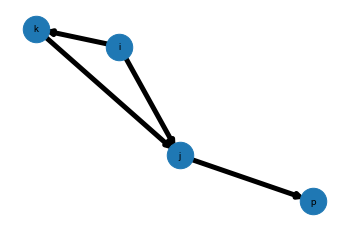

In [60]:
G = experiments.dataset[1]['network'][time_ten]

uppest_traffic = [(u, v) for (u, v, d) in G.edges(data=True) if d['traffic'] > 75]
upper_traffic = [(u, v) for (u, v, d) in G.edges(data=True) if 75 > d['traffic'] > 50]
lower_traffic = [(u, v) for (u, v, d) in G.edges(data=True) if 50 > d['traffic'] > 25]
lowest_traffic = [(u, v) for (u, v, d) in G.edges(data=True) if d['traffic'] < 25]

pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=700)
# for i in edge_traffic:
nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')    
# nx.draw_networkx_edges(G, pos, width=1, edge_list=lowest_traffic, edge_color='g')
# nx.draw_networkx_edges(G, pos, width=7, edge_list=uppest_traffic, edge_color='b')
nx.draw_networkx_edges(G, pos, width=5, edge_list=upper_traffic)
# nx.draw_networkx_edges(G, pos, edge_list=lower_traffic)




plt.axis('off')
plt.show()

In [61]:
 G.edges

OutEdgeView([('i', 'j'), ('i', 'k'), ('j', 'p'), ('k', 'j')])

In [62]:
for (u, v, d) in G.edges(data=True):
    print(d['traffic'])

115
341
0
0


In [63]:
# edge_color=colors,
#         width=4, edge_cmap=plt.cm.Blues, with_labels=False

In [64]:
uppest_traffic

[('i', 'j'), ('i', 'k')]

In [65]:
upper_traffic

[]

In [66]:
lowest_traffic

[('j', 'p'), ('k', 'j')]

In [67]:
temp_list = [1,2,3]

In [68]:
temp_list.copy()

[1, 2, 3]